## **Load Library**

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')

print("Importing library...\n")

import cv2
import PIL
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib
import mediapipe as mp
import ipywidgets as widgets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as T
from huggingface_hub import hf_hub_download

print(f"Torch   : {torch.__version__}")
print(f"MediaPipe   : {mp.__version__}")
print(f"OpenCV      : {cv2.__version__}")
print(f"NumPy       : {np.__version__}")
print(f"Pandas      : {pd.__version__}")
print(f"Seaborn     : {sns.__version__}")
print(f"Pillow      : {PIL.__version__}")
print(f"Matplotlib  : {matplotlib.__version__}")

print("\nAll library loaded successfully")

Importing library...

Torch   : 2.9.1+cpu
MediaPipe   : 0.10.14
OpenCV      : 4.12.0
NumPy       : 2.1.3
Pandas      : 2.3.3
Seaborn     : 0.13.2
Pillow      : 12.0.0
Matplotlib  : 3.10.7

All library loaded successfully


## **Load Pre-Trained Model and Predict Test**

Using device: cpu
✓ Model downloaded to: C:\Users\ADVAN\.cache\huggingface\hub\models--fahd9999--face_shape_classification\snapshots\537861ef28ac2cca7bd0228170013b0f5d9e5f04\model_85_nn_.pth
Loading model...
✓ Model loaded successfully!
------------------------------------------------------------
Test Model on Female


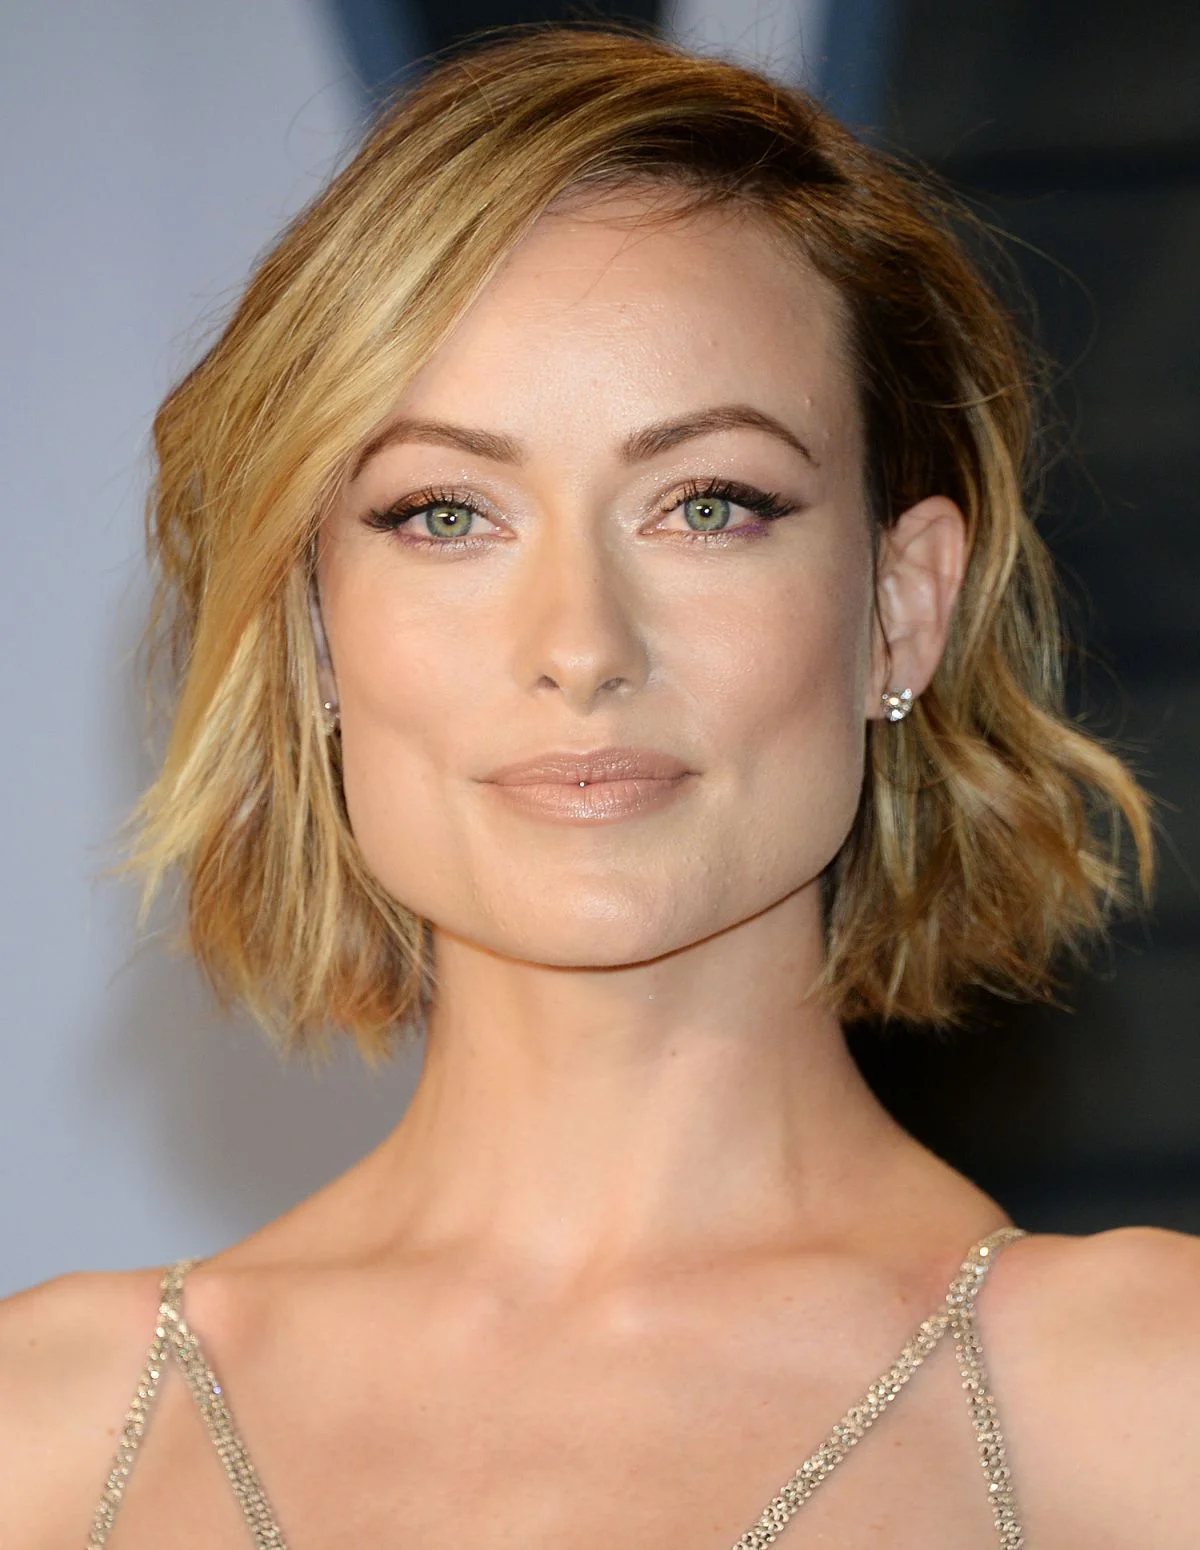


Processing image: wanita1.jpg
Predicting...

🎯 Model menebak bentuk wajah: SQUARE
📊 Confidence               : 94.09%

📋 Detail semua kelas:
  • Square   → 94.09% ███████████████████████████████████████████████
  • Oval     →  1.94% 
  • Heart    →  1.35% 
  • Oblong   →  1.33% 
  • Round    →  1.30% 
------------------------------------------------------------
Test Model on Male


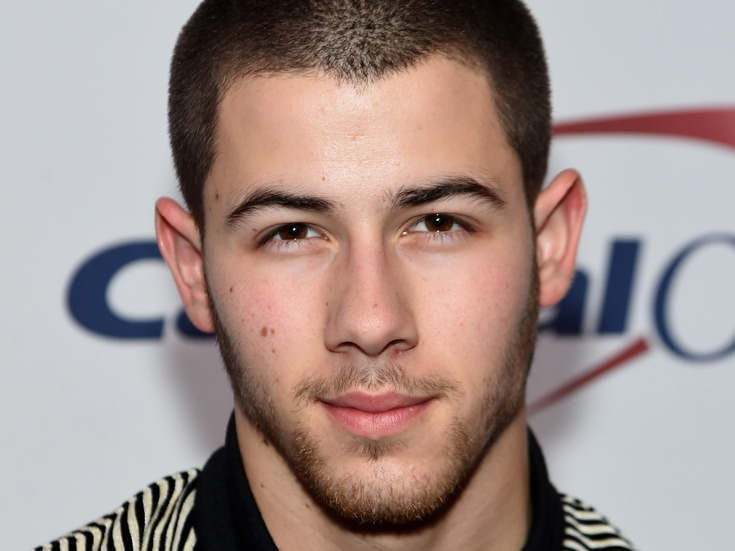


Processing image: pria1.jpg
Predicting...

🎯 Model menebak bentuk wajah: HEART
📊 Confidence               : 83.67%

📋 Detail semua kelas:
  • Heart    → 83.67% █████████████████████████████████████████
  • Oval     → 10.64% █████
  • Oblong   →  2.44% █
  • Square   →  2.12% █
  • Round    →  1.13% 


In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as T
from PIL import Image
from IPython.display import Image as IPImage, display
from huggingface_hub import hf_hub_download

# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Download model
print("Downloading model from Hugging Face...")
model_path = hf_hub_download(
    repo_id="fahd9999/face_shape_classification",
    filename="model_85_nn_.pth"
)
print(f"✓ Model downloaded to: {model_path}")

# Load model
print("Loading model...")
model = torch.load(model_path, map_location=torch.device(device), weights_only=False)
model.eval()
model.to(device)
print("✓ Model loaded successfully!")
print("-" * 60)

# Preprocessing
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Class names
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Load & predict Female
print("Test Model on Female")
image_path = './test/wanita1.jpg'
display(IPImage(filename=image_path, width=400))

print(f"\nProcessing image: {image_path}")
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(device)

# Prediction
print("Predicting...")
with torch.inference_mode():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

# Results
print(f"\n{'='*60}")
print(f"🎯 Model menebak bentuk wajah: {class_names[pred_idx].upper()}")
print(f"📊 Confidence               : {probs[0][pred_idx]:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail semua kelas:")

probs_dict = {class_names[i]: probs[0][i].item() for i in range(len(class_names))}
sorted_probs = dict(sorted(probs_dict.items(), key=lambda x: x[1], reverse=True))

for name, prob in sorted_probs.items():
    bar = "█" * int(prob / 2)
    print(f"  • {name:8} → {prob:5.2f}% {bar}")
print("-"*60)

# Load & predict Male
print("Test Model on Male")
image_path = './test/pria1.jpg'
display(IPImage(filename=image_path, width=400))

print(f"\nProcessing image: {image_path}")
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(device)

# Prediction
print("Predicting...")
with torch.inference_mode():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

# Results
print(f"\n{'='*60}")
print(f"🎯 Model menebak bentuk wajah: {class_names[pred_idx].upper()}")
print(f"📊 Confidence               : {probs[0][pred_idx]:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail semua kelas:")

probs_dict = {class_names[i]: probs[0][i].item() for i in range(len(class_names))}
sorted_probs = dict(sorted(probs_dict.items(), key=lambda x: x[1], reverse=True))

for name, prob in sorted_probs.items():
    bar = "█" * int(prob / 2)
    print(f"  • {name:8} → {prob:5.2f}% {bar}")

Load Glasses Frame

Memeriksa folder 'frames'...

Berhasil load → aviator.png  (ukuran: (600, 600, 4))
Berhasil load → oval.png  (ukuran: (600, 600, 4))
Berhasil load → wayfarer.png  (ukuran: (600, 600, 4))
Berhasil load → round.png  (ukuran: (600, 600, 4))
Berhasil load → pantos.png  (ukuran: (600, 600, 4))
Berhasil load → square.png  (ukuran: (600, 600, 4))
Berhasil load → rectangle.png  (ukuran: (600, 600, 4))
Berhasil load → cateye.png  (ukuran: (600, 600, 4))
Berhasil load → browline.png  (ukuran: (600, 600, 4))

Total berhasil load : 9 / 9
Semua frame berhasil di-load!

Preview semua frame (ukuran kecil):


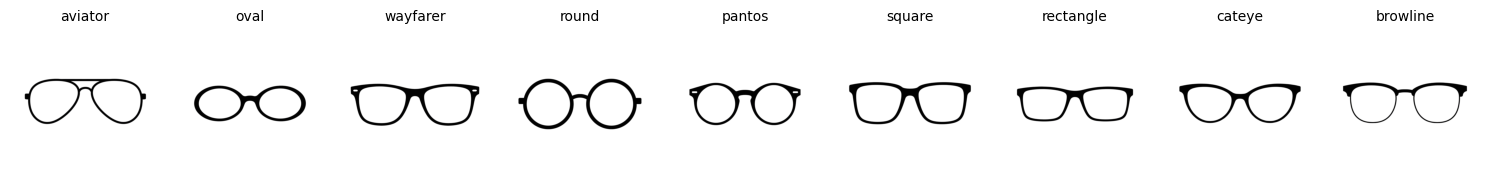

In [ ]:
import os
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt

# 1. Tentukan folder
folder = "frames"

# 2. Daftar semua file yang harus ada
expected_frames = [
    "aviator", "oval", "wayfarer", "round", 
    "pantos", "square", "rectangle", "cateye", "browline"
]

# 3. Dictionary untuk menyimpan gambar yang berhasil di-load
frames_dict = {}
missing_files = []

print("Memeriksa folder 'frames'...\n")

# 4. Loop load satu per satu
for name in expected_frames:
    filename = f"{name}.png"
    path = os.path.join(folder, filename)
    
    if os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        if img is not None:
            frames_dict[name] = img
            print(f"Berhasil load → {filename}  (ukuran: {img.shape})")
        else:
            print(f"Gagal baca gambar → {filename}")
            missing_files.append(filename)
    else:
        print(f"File tidak ditemukan → {filename}")
        missing_files.append(filename)

# 5. Ringkasan
print("\n" + "="*60)
print(f"Total berhasil load : {len(frames_dict)} / 9")
if missing_files:
    print(f"File yang hilang/gagal : {', '.join(missing_files)}")
else:
    print("Semua frame berhasil di-load!")

# 6. Tampilkan preview kecil semua frame
print("\nPreview semua frame (ukuran kecil):")
fig, axes = plt.subplots(1, len(frames_dict), figsize=(15, 3))
if len(frames_dict) == 1:
    axes = [axes]
for idx, (name, img) in enumerate(frames_dict.items()):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    axes[idx].imshow(rgb_img)
    axes[idx].set_title(name, fontsize=10)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import os
import urllib.request
import zipfile
from pathlib import Path

model_dir = Path("mediapipe_models")
model_dir.mkdir(exist_ok=True)

# Download dari GitHub MediaPipe repo (link resmi)
url = "https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task"
local_path = model_dir / "face_landmarker.task"

if not local_path.exists():
    print("Downloading face_landmarker.task (~2.5MB)...")
    urllib.request.urlretrieve(url, local_path)
    print(f"✓ Model saved to: {local_path}")
else:
    print("Model sudah ada!")

print("Download selesai!")

✓ Model saved to: mediapipe_models/face_landmarker.task
Download selesai! Sekarang jalankan Cell 3 lagi.


In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import time
import os

model_path = "mediapipe_models/face_landmarker.task"

# Inisialisasi Face Landmarker
BaseOptions = python.BaseOptions
FaceLandmarker = vision.FaceLandmarker
FaceLandmarkerOptions = vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO,
    num_faces=1,
    min_face_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

face_landmarker = FaceLandmarker.create_from_options(options)

# Indeks landmark penting (Face Landmarker pakai indeks yang sama seperti Face Mesh)
LEFT_EYE  = 33
RIGHT_EYE = 263
NOSE_TIP  = 1

# Titik panduan tetap
GUIDE_LEFT_EYE  = (200, 200)
GUIDE_RIGHT_EYE = (440, 200)
GUIDE_NOSE      = (320, 340)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)   # lebar
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)   # tinggi

print("Cell 3: Webcam + MediaPipe 0.10.31+ + Titik Panduan")
print("Arahkan wajah → lihat landmark + 3 titik MERAH")
print("Tekan 'q' untuk keluar")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process frame
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)
    timestamp_ms = int(time.time() * 1000)
    results = face_landmarker.detect_for_video(mp_image, timestamp_ms)
    
    if results.face_landmarks:
        landmarks = results.face_landmarks[0]
        
        h, w, _ = frame.shape
        
        # Gambar landmark (hijau kecil)
        for lm in landmarks:
            x = int(lm.x * w)
            y = int(lm.y * h)
            cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)
        
        # Posisi mata & hidung (titik biru)
        left_eye  = (int(landmarks[LEFT_EYE].x * w),  int(landmarks[LEFT_EYE].y * h))
        right_eye = (int(landmarks[RIGHT_EYE].x * w), int(landmarks[RIGHT_EYE].y * h))
        nose      = (int(landmarks[NOSE_TIP].x * w),  int(landmarks[NOSE_TIP].y * h))
        
        cv2.circle(frame, left_eye,  8, (255,100,0), -1)
        cv2.circle(frame, right_eye, 8, (255,100,0), -1)
        cv2.circle(frame, nose,      8, (255,100,0), -1)
    
    # 3 titik panduan MERAH tetap
    cv2.circle(frame, GUIDE_LEFT_EYE,  15, (0,0,255), -1)
    cv2.circle(frame, GUIDE_RIGHT_EYE, 15, (0,0,255), -1)
    cv2.circle(frame, GUIDE_NOSE,      15, (0,0,255), -1)
    
    # Teks instruksi
    cv2.putText(frame, "Align mata & hidung ke titik MERAH", (10, 30), 
                cv2.FONT_HERSHEY_DUPLEX, 0.9, (255,255,255), 2)
    cv2.putText(frame, "Tekan 'q' untuk lanjut", (10, 70), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (200,200,255), 2)
    
    cv2.imshow("Cell 3 - MediaPipe Face Landmarker", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

W0000 00:00:1766409044.200096   53827 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1766409044.207196   53831 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1766409044.226771   53828 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Cell 3: Webcam + MediaPipe 0.10.31+ + Titik Panduan
Arahkan wajah → lihat landmark + 3 titik MERAH
Tekan 'q' untuk keluar
Cell 3 selesai! Siap untuk cell selanjutnya.
